Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Step 1 : Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

#### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN/Skin_Data_Store/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/CNN/Skin_Data_Store/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Step 2: Load images using keras.preprocessing

Load  images off disk 

#### Dataset Creation and definition of parameters



In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Step 3: Visulize the data

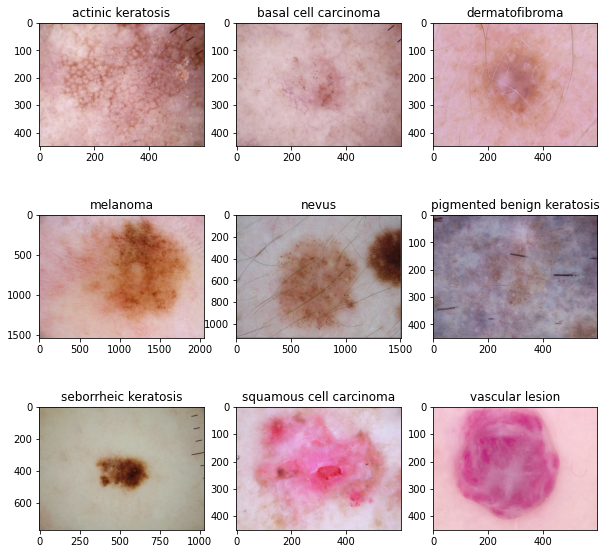

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

`Dataset.cache()` will keep the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` will overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Step 4: Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset.

In [ ]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Step 5: Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Step 6: Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 78ms/step - loss: 0.3313 - accuracy: 0.8862 - val_loss: 2.5301 - val_accuracy: 0.4832
Epoch 2/20
56/56 [==============================] - 4s 76ms/step - loss: 0.3022 - accuracy: 0.9018 - val_loss: 3.1709 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 0.2948 - accuracy: 0.8906 - val_loss: 3.1920 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 0.3296 - accuracy: 0.8917 - val_loss: 2.7841 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 0.2917 - accuracy: 0.8979 - val_loss: 3.0559 - val_accuracy: 0.4183
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 0.2625 - accuracy: 0.9102 - val_loss: 2.6612 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 0.2536 - accuracy: 0.9062 - val_loss: 2.5718 - val_accuracy: 0.4787
Epoch 8/20
56

Visualizing training results

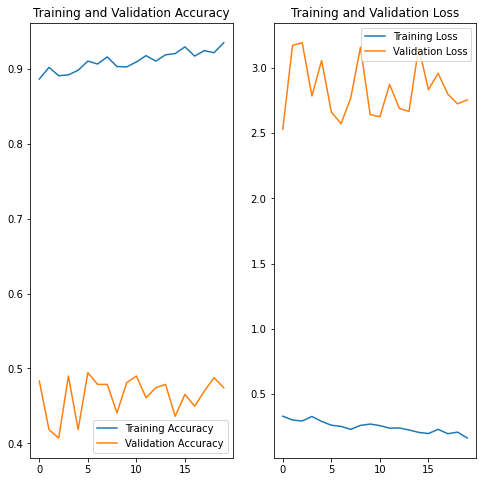

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training & test 
- The accuracy is just around 80%



In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

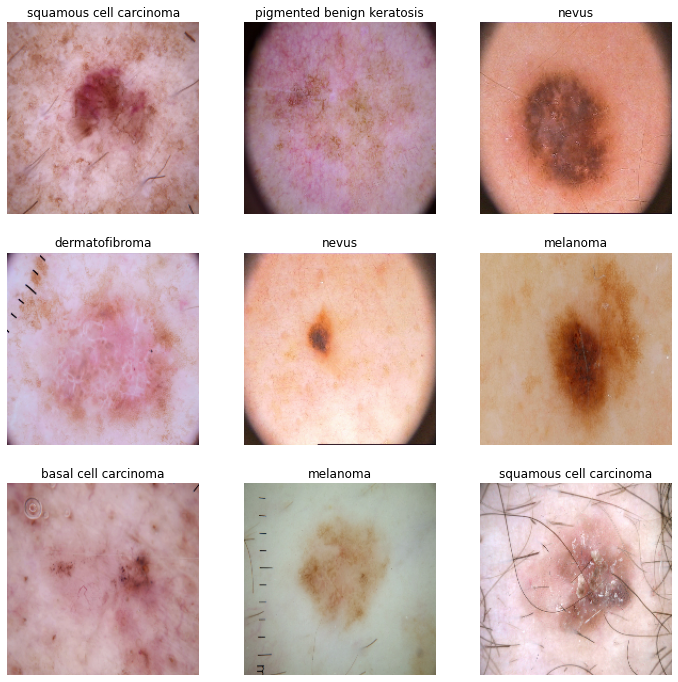

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Step 7: Create the model, compile and train the model
### Use dropout layer


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



#### Compiling the model

In [ ]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 94ms/step - loss: 1.9727 - accuracy: 0.2489 - val_loss: 1.9527 - val_accuracy: 0.2416
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 1.9345 - accuracy: 0.2712 - val_loss: 1.9227 - val_accuracy: 0.2416
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 1.8456 - accuracy: 0.2924 - val_loss: 1.7467 - val_accuracy: 0.3400
Epoch 4/20
56/56 [==============================] - 5s 87ms/step - loss: 1.8200 - accuracy: 0.3231 - val_loss: 1.7685 - val_accuracy: 0.3960
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7504 - accuracy: 0.3577 - val_loss: 1.6936 - val_accuracy: 0.3736
Epoch 6/20
56/56 [==============================] - 5s 88ms/step - loss: 1.6232 - accuracy: 0.4113 - val_loss: 1.6549 - val_accuracy: 0.4094
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 1.6224 - accuracy: 0.4196 - val_loss: 1.6023 - val_accuracy: 0.4295
Epoch 8/20
56

### Step 8:  Visualizing the results

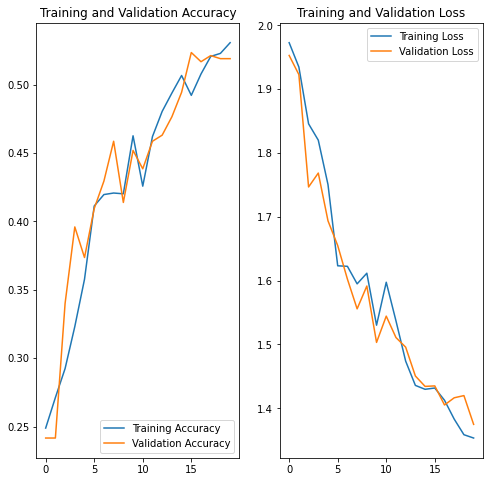

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding from Second Model**

- Not Improvement in accuracy 
- Overfitting problem has solved 


### Step 9:  Find the distribution of classes in the training dataset.
#### Check if there is any class imbalance. We need to **check** what is the distribution of classes in the data.

In [ ]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
1,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
2,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
3,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
4,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
2235,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
2236,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
2237,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
1,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
2,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
3,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
4,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
2235,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
2236,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
2237,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion


<BarContainer object of 9 artists>

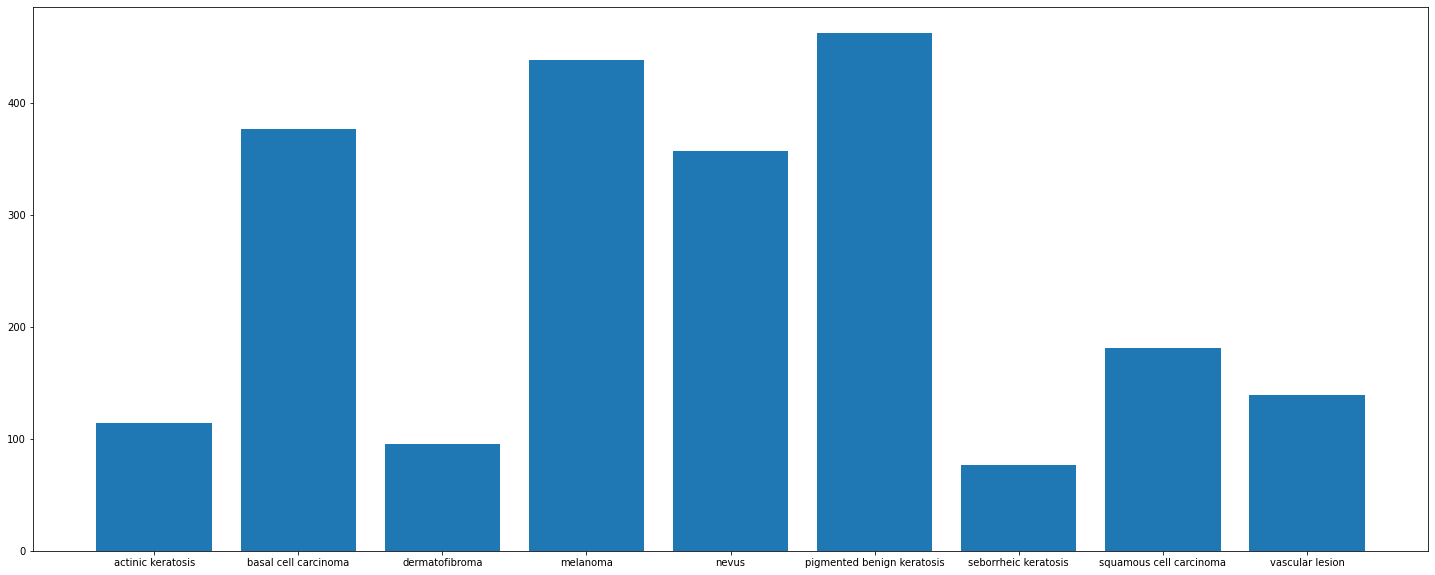

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Step 10: Our findings
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- 

**squamous cell carcinoma** has least number of samples

Answer-2:- 

**actinic keratosis, seborrheic  and dermatofibroma** have proportionate number of classes.

**melanoma and pigmented benign keratosis** have proprtionate number of classes

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Step 11: Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
#path_to_training_dataset="/content/drive/MyDrive/CNN/Skin_Data_Store/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/CNN/Skin_Data_Store/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9CE0451E90>: 100%|██████████| 500/500 [00:48<00:00, 10.23 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9CE5AFDD10>: 100%|██████████| 500/500 [00:49<00:00, 10.20 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9CE0408990>: 100%|██████████| 500/500 [00:45<00:00, 10.94 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CE0F4D090>: 100%|██████████| 500/500 [00:41<00:00, 11.92 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F9CE04C0F50>: 100%|██████████| 500/500 [00:47<00:00, 10.58 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CE5461B10>: 100%|██████████| 500/500 [00:47<00:00, 10.45 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CE0504C90>: 100%|██████████| 500/500 [00:39<00:00, 12.70 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CE5467A50>: 100%|██████████| 500/500 [00:39<00:00, 12.69 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin_Data_Store/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=853x680 at 0x7F9CE1FF7710>: 100%|██████████| 500/500 [00:44<00:00, 11.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types

In [ ]:
data_train1 = pathlib.Path("/content/drive/MyDrive/CNN/Skin_Data_Store/Train/output")
image_count_train1 = len(list(data_train1.glob('*/*.jpg')))
print(image_count_train1)


4500


In [ ]:
##
for i in class_names:
      
    for j in data_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
1,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
2,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
3,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
4,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
6735,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
6736,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion
6737,/content/drive/MyDrive/CNN/Skin_Data_Store/Tra...,vascular lesion


### Step 12: Distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1413
melanoma                      1289
basal cell carcinoma          1145
nevus                         1082
squamous cell carcinoma        535
vascular lesion                436
actinic keratosis              351
dermatofibroma                 278
seborrheic keratosis           210
Name: Label, dtype: int64

We have added images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Step 13: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/CNN/Skin_Data_Store/Train/output")
data_train1=pathlib.Path("/content/drive/MyDrive/CNN/Skin_Data_Store/Train")

In [ ]:
data_train1

PosixPath('/content/drive/MyDrive/CNN/Skin_Data_Store/Train')

### Step 14: Create a training dataset

In [ ]:
image_count_train1 = len(list(data_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_train1=pathlib.Path("/content/drive/MyDrive/CNN/Skin_Data_Store/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


### Step 15: Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


###  Step 15:  Create your model (make sure to include normalization)

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

###Step 15: Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 16:   Train your model

In [ ]:
epochs =30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 37s 207ms/step - loss: nan - accuracy: 0.0198 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/30
169/169 [==============================] - 35s 198ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/30
169/169 [==============================] - 36s 206ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/30
169/169 [==============================] - 34s 197ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/30
169/169 [==============================] - 34s 197ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/30
169/169 [==============================] - 34s 197ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/30
169/169 [==============================] - 34s 197ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/30
169/169 [==================

###Step 17:  Visualize the model results

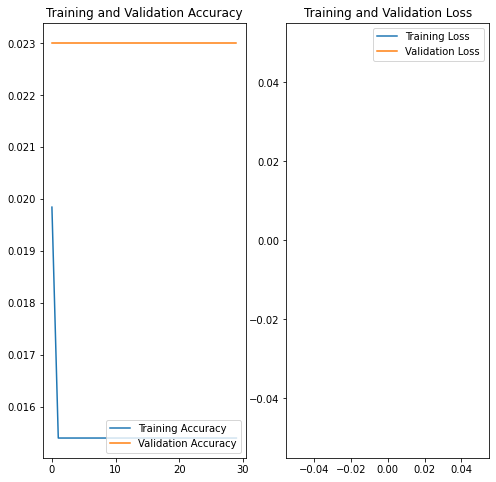

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Step 18:  Analyze your results



- Model is still overfitting

- The Model can be further improved 